# Machine Learning for NLP Classification

In [ ]:
# !pip install -r "/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari/requirements - Colab.txt"
!pip install sastrawi

In [ ]:
# import library
import pandas as pd
import numpy as np
import os
import glob

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#wordcloud library
from wordcloud import WordCloud, STOPWORDS
import datetime, nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# import machine learning model
from sklearn.utils import resample
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle

# Text processing
from sklearn.feature_extraction.text import TfidfVectorizer

import sys
sys.path.append('/content/drive/MyDrive/Ari Folders/Data_Ari/Data_Science/Digital Skola after Fazz/Corporate Training/Astra Honda Motor/For Ari')
import collection_function as cus_viz

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [ ]:
# # Upload file from Google Drive

# from google.colab import files

# uploaded = files.upload()

In [ ]:
# data = pd.read_csv("insurance.csv")

# display(data.info())
# data.head()

In [ ]:
# data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/refs/heads/main/dataset/Ulasan%20Otomotif.csv")
# display(data.info())
# data.head()

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/refs/heads/main/dataset/News_Title_NLP.csv")

data = data.rename(columns={'News Title':'Ulasan','Category':'Label'})
data = data[['Ulasan','Label']]
data = data.iloc[:5000,:]
display(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ulasan  5000 non-null   object
 1   Label   5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


None

,Ulasan,Label
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business


## Exploratory Data Analysis

,Label,Ulasan
3,Technology,1257
2,Medical,551
1,Entertainment,1873
0,Business,1319


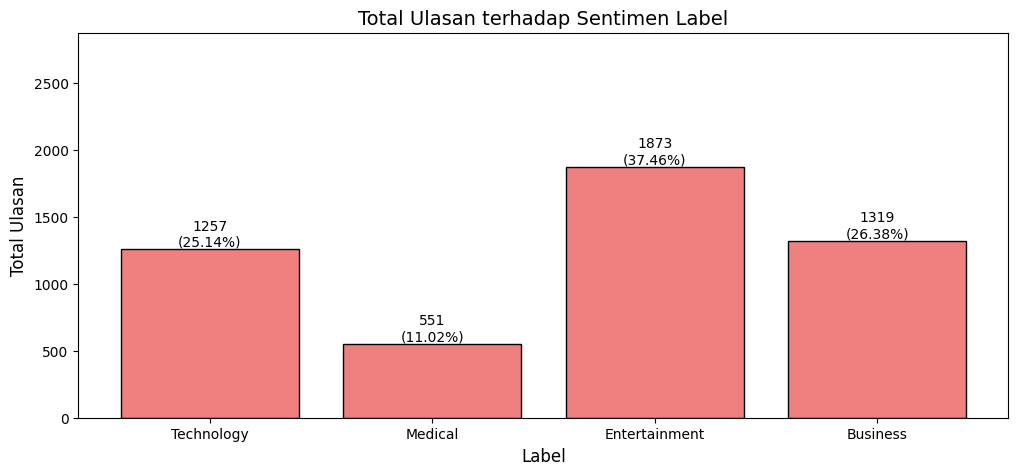

In [ ]:
# Perbandingan karyawan dapat promosi dan tidak
pivot_promoted = cus_viz.simple_pivot(data=data, ind='Label', val='Ulasan', agg='count').sort_values(by='Label', ascending=False)
display(pivot_promoted)

# visualisasi
cus_viz.bar_chart(data=pivot_promoted, x_vals='Label', y_vals='Ulasan', title='Total Ulasan terhadap Sentimen Label',
                  xlabel='Label', ylabel='Total Ulasan', ymax=1000)

In [ ]:
#stopwords are used to remove any redundant words
stopwords = set(STOPWORDS)

#setting the wordcloud
words_comment = WordCloud(background_color = 'white', max_words = 3000,
                          stopwords = stopwords)

#generate the word cloud
text = " ".join(news for news in data['Ulasan'])
words_comment.generate(text)

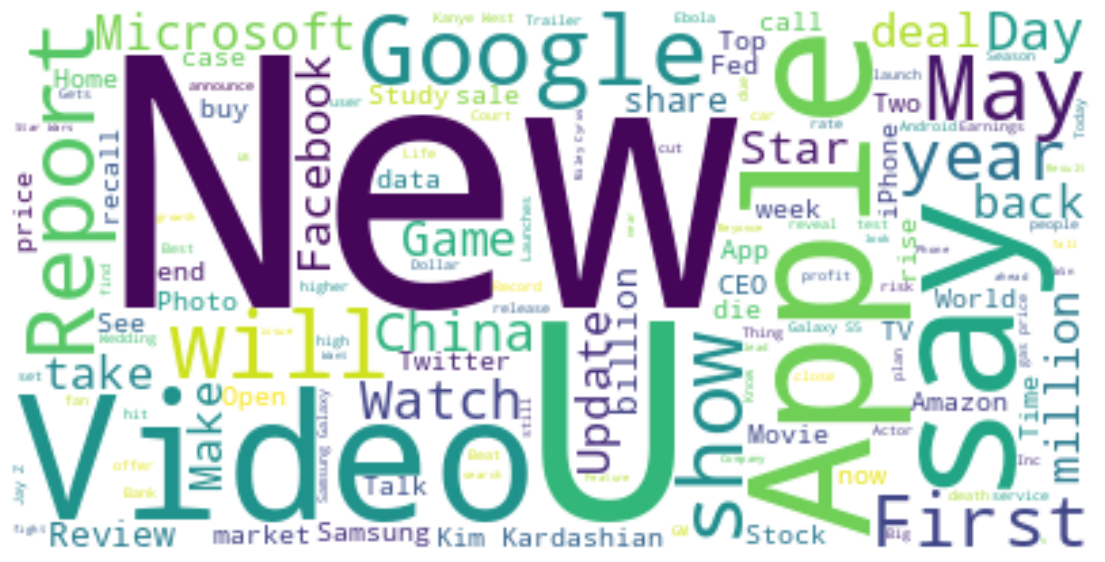

In [ ]:
#show the generated image
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(words_comment, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Pre-processing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def process_text(text):
  from nltk.corpus import stopwords
  from nltk.tokenize import word_tokenize

  #remove the punction that is not important
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc = nopunc.lower()

  #remove useless word in data
  stop_words = set(stopwords.words('english'))

  word_tokens = word_tokenize(nopunc)

  clean_words = [w for w in word_tokens if not w in stop_words]

  # # stemming
  # factory = StemmerFactory()
  # stemmer = factory.create_stemmer()
  # stemmed_words = [stemmer.stem(w) for w in clean_words]

  # return stemmed_words
  return clean_words

In [ ]:
data['Ulasan'].apply(process_text)

,Ulasan
0,"[google, rolls, out, stories, for, tricked, ou..."
1,"[dov, charneys, redeeming, quality]"
2,"[white, god, adds, un, certain, regard, to, th..."
3,"[google, shows, off, androids, for, wearables,..."
4,"[china, may, new, bank, loans, at, 8708, bln, ..."
...,...
4995,"[stock, futures, up, ahead, of, fed, speakers,..."
4996,"[gop, women, paycheck, fairness, act, merely, ..."
4997,"[world, cup, 2014, best, wishes, for, cup, com..."
4998,"[chris, brown, must, stay, in, jail, a, month,..."


In [ ]:
# Cek jumlah per kata yang muncul dari 1 dokumen
def value_counts_word(x):
  word_list = []

  for word in x:
    word_list.extend(word)
  word_freq = pd.Series(word_list).value_counts()

  return word_freq[:10]

value_counts_word(data['Ulasan'].apply(process_text))

,count
to,1222
the,857
in,826
of,732
for,626
on,466
and,444
a,369
with,300
at,279


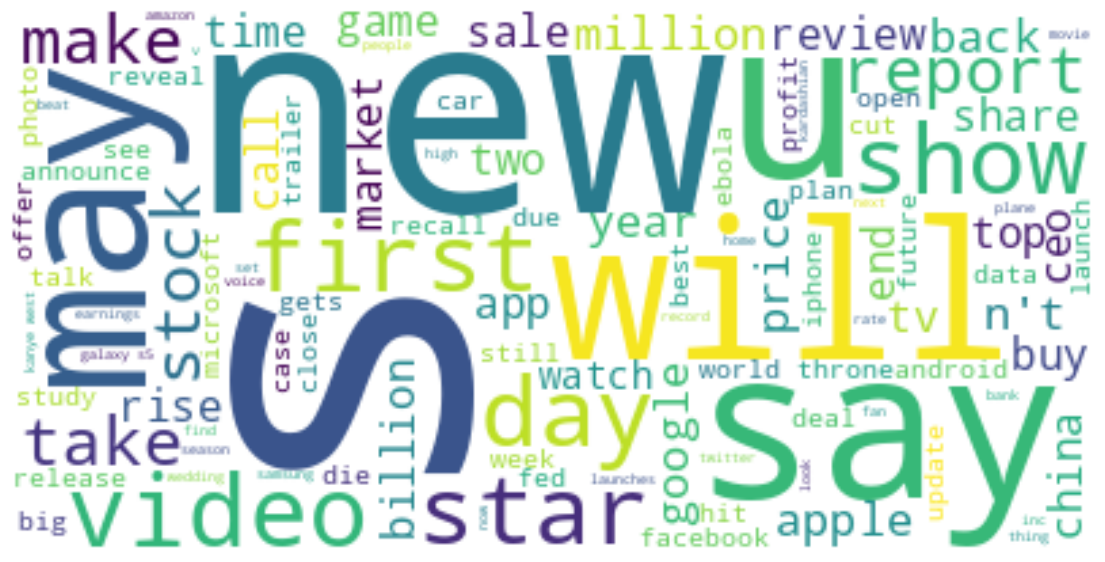

In [ ]:
clean = " ".join(process_text(data['Ulasan']))
words_comment.generate(clean)

#show the generated image
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(words_comment, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Processing

In [ ]:
# Text procesing using TF-IDF
tp_matrix = TfidfVectorizer(analyzer=process_text, max_features=500, min_df=5, max_df=0.7, use_idf=True)
tp_matrix_result = tp_matrix.fit_transform(data['Ulasan'])
tp_matrix_result

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21918 stored elements and shape (5000, 500)>

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(tp_matrix_result, data['Label'], test_size=0.30, random_state=43)

## Modelling & Evalution

In [ ]:
# Logistic Regression Modelling
legReg = LogisticRegression()
legReg.fit(X_train, y_train)

# Evaluation
y_predict_train = legReg.predict(X_train)
y_predict_test = legReg.predict(X_test)

print("Model: Logistic Regression")
print("Training Accuracy: {:.2f}".format(accuracy_score(y_train, y_predict_train)))
print("Testing Accuracy: {:.2f}".format(accuracy_score(y_test, y_predict_test)))
print(classification_report(y_test, y_predict_test))

Model: Logistic Regression
Training Accuracy: 0.79
Testing Accuracy: 0.73
               precision    recall  f1-score   support

     Business       0.69      0.72      0.70       386
Entertainment       0.70      0.89      0.78       575
      Medical       0.86      0.45      0.59       171
   Technology       0.80      0.61      0.69       368

     accuracy                           0.73      1500
    macro avg       0.76      0.67      0.69      1500
 weighted avg       0.74      0.73      0.72      1500



In [ ]:
def classification_model(model, X_train, X_test, y_train, y_test):
  """
  This function is used to run multiple model
  """

  # Modelling
  legReg = model
  legReg.fit(X_train, y_train)

  # Evaluation
  y_predict_train = legReg.predict(X_train)
  y_predict_test = legReg.predict(X_test)

  print("Model: {}".format(model))
  print("Training Accuracy: {:.2f}".format(accuracy_score(y_train, y_predict_train)))
  print("Testing Accuracy: {:.2f}".format(accuracy_score(y_test, y_predict_test)))
  print(classification_report(y_test, y_predict_test))

In [ ]:
classification_model(model=DecisionTreeClassifier(), X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

Model: DecisionTreeClassifier()
Training Accuracy: 0.97
Testing Accuracy: 0.61
               precision    recall  f1-score   support

     Business       0.53      0.56      0.55       386
Entertainment       0.65      0.74      0.69       575
      Medical       0.51      0.43      0.46       171
   Technology       0.65      0.53      0.58       368

     accuracy                           0.61      1500
    macro avg       0.59      0.56      0.57      1500
 weighted avg       0.61      0.61      0.60      1500



In [ ]:
# modelling
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Copy X_test data diambil dari index y_test
X_test_copy = data.loc[y_test.index]

# Insert the price prediction and price original column
X_test_copy['label_prediction'] = y_test_pred

X_test_copy.head(10)

,Ulasan,Label,label_prediction
4851,"TweetDeck Is Back, XSS Vulnerability Fixed [UP...",Technology,Business
3471,Review: Guardians of the Galaxy Is Yet Another...,Entertainment,Entertainment
4276,'Strange' dinosaur was closest thing to a bird...,Technology,Entertainment
3529,Bowe Bergdahl's Roommate: He's A Deserter Who ...,Entertainment,Entertainment
1307,Alibaba's business model and the Chinese marke...,Business,Business
4060,"Gold rises on China growth, Ukraine",Business,Business
2759,"Parenting Links: Movie Star Moms, Rock Star Ki...",Entertainment,Entertainment
2802,KUWTK preview: Kim tells Rob he's 'not bipolar',Entertainment,Entertainment
1079,Palin: Surrendering Internet Control 'Colossal...,Technology,Technology
2980,Microsoft challenges U.S. warrant demanding em...,Technology,Technology


## Hyperparameter Tuning
1. Ganti dari sisi jenis vektorisasi-nya
2. Tuning dari sisi model machine learning

## Predict New Data

In [ ]:
# Using existing vectorize and transform the new data ulasan
ulasan = 'The internet in Jakarta is very slow'
data_ulasan_baru = tp_matrix.transform([ulasan])

# Predict
prediction = lr.predict(data_ulasan_baru)

print("Ulasan: {} adalah {}".format(ulasan, prediction[0]))

Ulasan: The internet in Jakarta is very slow adalah Technology


## Preparation for Deployment

In [ ]:
# Simpan semua encoder ke dalam satu file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tp_matrix, f)

# Simpan model yang digunakan
with open('trained_model_nlp_classification.pkl', 'wb') as f:
    pickle.dump(lr, f)

In [ ]:
data.iloc[100:110,:]

,Ulasan,Label
100,Beyoncé May Have Confirmed Jay-Z Cheating Rumo...,Entertainment
101,Malaysian plane search information still incon...,Business
102,'Sopranos' Creator Reveals Tony's Fate? [Updated],Entertainment
103,"Eli Wallach, star of 'The Good, the Bad and th...",Entertainment
104,Apple iOS 8: Check Out The 7 Most Jaw-Dropping...,Technology
105,Average gas price in Harrisburg area is 16 cen...,Technology
106,Was Apple's iPhone 6 no show expected?,Technology
107,'Godzilla' opens with smashing $93.2 million -...,Entertainment
108,"Bob Geldof pays tribute to ""beautiful"" Peaches",Entertainment
109,French bank BNP Paribas fined $8.9 billion for...,Business


In [ ]:
# data baru
data_baru = pd.DataFrame([{
    'Ulasan':'Supremacy of beauty pageant competition'
}])

data_baru

,Ulasan
0,Supremacy of beauty pageant competition


In [ ]:
# Load encoder dari file
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

# Transformasi data baru
X_new = vectorizer.transform(data_baru['Ulasan'])

# Load Model dari file
with open('trained_model_nlp_classification.pkl', 'rb') as f:
    model = pickle.load(f)

prediction = model.predict(X_new)

print("Ulasan: {} adalah {}".format(data_baru.iloc[0,:]['Ulasan'], prediction[0]))
# print(prediction[0])

Ulasan: Supremacy of beauty pageant competition adalah Entertainment
